In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy import stats 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
datafile1 = pd.read_csv("Data_Mining_Assignment_03/data1.csv",header=None)
datafile2 = pd.read_csv("Data_Mining_Assignment_03/data2.csv",header=None)
datafile3 = pd.read_csv("Data_Mining_Assignment_03/data3.csv",header=None)
datafile4 = pd.read_csv("Data_Mining_Assignment_03/data4.csv",header=None)
datafile5 = pd.read_csv("Data_Mining_Assignment_03/data5.csv",header=None)

# 1. Apply logistic regression and LDA on Data 1, Data 2, Data 3 and Data 4.

(a) Report sensitivity, specificity, precision and F measure. Plot ROC curve.

(b) Plot decision boundaries for all data.

(c) Plot the logistic regression curve for all data.

(d) Plot multivariate Gaussian density function corresponding to the positive & negative classes and their contours for Data 3.

(e) Compare the performance of logistic regression and LDA by statistical measures.

(f) Report the values of the parameters of the final models.

(g) Apply first order and second order optimization techniques in the case of logistic regression. Compare the performance of those two techniques in terms of
memory and time.

In [3]:
datafile1

,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1
...,...,...,...
195,47,17,-1
196,24,27,-1
197,18,18,-1
198,19,7,-1


In [4]:
datafile1.insert(0,"x0",1)

In [5]:
datafile1

,x0,0,1,2
0,1,6,32,1
1,1,26,39,1
2,1,2,38,1
3,1,25,39,1
4,1,3,35,1
...,...,...,...,...
195,1,47,17,-1
196,1,24,27,-1
197,1,18,18,-1
198,1,19,7,-1


In [6]:
datafile1[2]=datafile1[2].replace(-1,0)

In [7]:
datafile1

,x0,0,1,2
0,1,6,32,1
1,1,26,39,1
2,1,2,38,1
3,1,25,39,1
4,1,3,35,1
...,...,...,...,...
195,1,47,17,0
196,1,24,27,0
197,1,18,18,0
198,1,19,7,0


In [8]:
data1 = np.array(datafile1)
np.random.shuffle(data1)

In [9]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data1[0])-1)
  for i in range(10):
    np.random.shuffle(data1)
    training_data = data1[:int(0.8*len(data1))]
    
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))))
      
        delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
        w += delta
      except:
        print("Excepted")

  cost_fn = 0
  validation_data = data1[int(0.8*len(data1)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


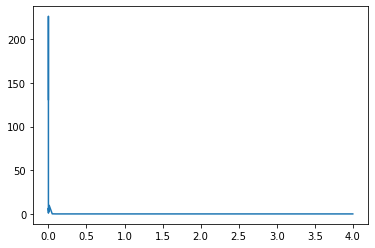

In [10]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [11]:

a = 3
w = np.ones(len(data1[0])-1)
training = data1[:int(0.8*len(data1))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]


  for i in range(len(training_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))) )
   
    delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
    w += delta

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if abs(cost_fn_old-cost_fn) < 0.000001:
    break 

cost_fn inf
cost_fn 7.000911466465276
cost_fn inf
cost_fn 2.9517826785529558e-05
cost_fn 2.9517826785529558e-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


In [12]:
print(w)

[  25.00273315 -346.93440431  307.07379515]


In [13]:
testing_data = data1[int(0.8*len(data1)):]
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [14]:
print(TP,FP,TN,FN)

19 2 19 0


In [15]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 0.9047619047619048
Precision is 0.9047619047619048
F-score is 0.9500000000000001


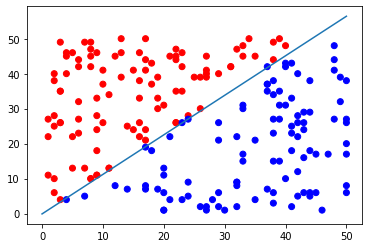

In [16]:
c = ["r" if i[3] == 1 else "b" for i in np.array(datafile1)]
x1 = np.linspace(0,50,100)
x2 = -(w[0]+w[1]*x1)/w[2]
plt.scatter(np.array(datafile1[0]) , np.array(datafile1[1]) ,c=c )
plt.plot(x1,x2)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


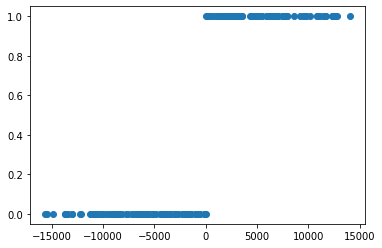

In [17]:
data_for_plot = [[],[]]
for i in range(len(data1)):
  t = np.inner(w,data1[i][:-1])
  f = 1 / ( 1+ np.exp(-t) )
  data_for_plot[0].append(t)
  data_for_plot[1].append(f)
plt.scatter(data_for_plot[0],data_for_plot[1])
plt.show()

LDA on DATA 1

In [18]:
datafile1 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data1.csv",header=None)

In [19]:
datafile1[2]=datafile1[2].replace(-1,0)

In [20]:
datafile1

,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1
...,...,...,...
195,47,17,0
196,24,27,0
197,18,18,0
198,19,7,0


In [21]:
x = dict(datafile1[2].value_counts())

In [22]:
pi_1 = x[1] / x[0] + x[1]
pi_0 = x[0] / x[0] + x[1]

In [23]:
dataf1 = np.array(datafile1)
np.random.shuffle(dataf1)
data1 = dataf1[:int(0.7*len(dataf1))]

In [24]:
n = len(data1[0])-1
u1 = np.zeros(n)
u0 = np.zeros(n)
for i in range(len(data1)):
  if data1[i][-1] == 1:
    u1 += data1[i][:-1]
  else:
    u0 += data1[i][:-1]
u1 = u1 / x[1]
u0 = u0 / x[0]
print(u1)
print(u0)



[10.98 24.93]
[24.13 13.46]


In [25]:
E1 = np.zeros((n,n))
E0 = np.zeros((n,n))
for i in range(len(data1)):
  if data1[i][-1] == 1:
    k = data1[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  else:
    k = data1[i][:-1] - u0
    E0 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E0 = E0 / (x[0] -1 )

In [26]:
print(E1)
print(E0)

[[ 85.51786667  67.19576566]
 [ 67.19576566 168.0441697 ]]
[[168.69787071  97.79541818]
 [ 97.79541818 155.50857374]]


In [27]:
E = (x[1]-1)*E1 + (x[0]-1)*E0 
E = E / (x[1]+x[0]-2)
print(E)

[[127.10786869  82.49559192]
 [ 82.49559192 161.77637172]]


In [28]:
w = np.matmul(np.linalg.inv(E) , (u1-u0).reshape(-1,1))

In [29]:
print(w)

[[-0.22341106]
 [ 0.18482568]]


In [30]:
w0 = -0.5 * np.matmul(np.matmul(u1,np.linalg.inv(E)), u1.reshape(-1,1) ) + 0.5 * np.matmul(np.matmul(u0,np.linalg.inv(E)), u0.reshape(-1,1) ) + np.log(pi_1/pi_0)
print(w0)

[0.37425227]


In [31]:
w = w.reshape(1,-1)[0]

In [32]:
testing_data = dataf1[int(0.7*len(dataf1)):]
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1]) + w0[0]
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [33]:
print(TP,FP,TN,FN)

28 2 30 0


In [34]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 0.9375
Precision is 0.9333333333333333
F-score is 0.9655172413793104


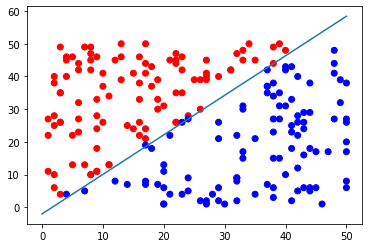

In [35]:
c = ["r" if i[2] == 1 else "b" for i in np.array(datafile1)]
x1 = np.linspace(0,50,100)
x2 = -(w0[0]+w[0]*x1)/w[1]
plt.scatter(np.array(datafile1[0]) , np.array(datafile1[1]) ,c=c )
plt.plot(x1,x2)
plt.show()

**Data 2**

In [36]:
datafile2

,0,1,2,3
0,69,16,54,1
1,59,18,79,1
2,89,1,81,1
3,84,14,20,1
4,92,48,73,1
...,...,...,...,...
195,48,49,53,-1
196,40,93,63,-1
197,67,99,40,-1
198,60,80,90,-1


In [37]:
datafile2.insert(0,"x0",1)

In [38]:
datafile2

,x0,0,1,2,3
0,1,69,16,54,1
1,1,59,18,79,1
2,1,89,1,81,1
3,1,84,14,20,1
4,1,92,48,73,1
...,...,...,...,...,...
195,1,48,49,53,-1
196,1,40,93,63,-1
197,1,67,99,40,-1
198,1,60,80,90,-1


In [39]:
datafile2[3]=datafile2[3].replace(-1,0)

In [40]:
datafile2

,x0,0,1,2,3
0,1,69,16,54,1
1,1,59,18,79,1
2,1,89,1,81,1
3,1,84,14,20,1
4,1,92,48,73,1
...,...,...,...,...,...
195,1,48,49,53,0
196,1,40,93,63,0
197,1,67,99,40,0
198,1,60,80,90,0


In [41]:
data2 = np.array(datafile2)
np.random.shuffle(data2)

In [42]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data2[0])-1)
  for i in range(10):
    np.random.shuffle(data2)
    training_data = data2[:int(0.8*len(data2))]
    
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))))
      
        delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
        w += delta
      except:
        print("Excepted")

  cost_fn = 0
  validation_data = data2[int(0.8*len(data2)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


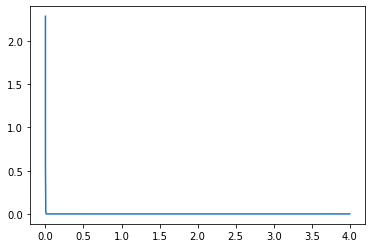

In [43]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [44]:

a = 1
w = np.random.random(len(data2[0])-1)
training = data2[:int(0.8*len(data2))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]


  for i in range(len(training_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))) )
   
    delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
    w += delta

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if abs(cost_fn_old-cost_fn) < 0.000001:
    break 

cost_fn 244.7088998376421
cost_fn 244.7088998376421


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [45]:
print(w)

[   3.65746089   61.95480861 -245.68740632  137.49660928]


In [46]:
testing_data = data2[int(0.8*len(data2)):]
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [47]:
print(TP,FP,TN,FN)

22 0 18 0


In [48]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


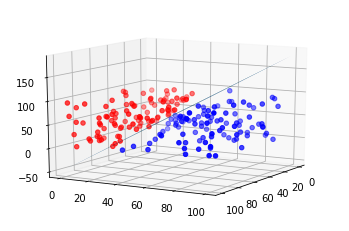

In [49]:
c = ["r" if i[4] == 1 else "b" for i in np.array(datafile2)]
x1 = np.linspace(0,100,100)
x2 = np.linspace(0,100,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = -(w[0]+w[1]*X1+w[2]*X2)/w[3]
ax=plt.figure().gca(projection="3d")
ax.scatter3D(np.array(datafile2[0]) , np.array(datafile2[1]) ,np.array(datafile2[2]),c=c )
ax.plot_surface(X1,X2,X3)
ax.view_init(13,30)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


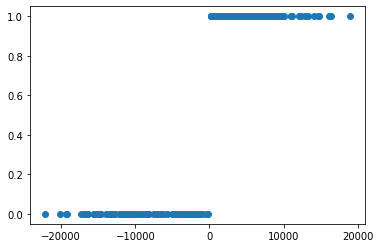

In [50]:
data_for_plot = [[],[]]
for i in range(len(data2)):
  t = np.inner(w,data2[i][:-1])
  f = 1 / ( 1+ np.exp(-t) )
  data_for_plot[0].append(t)
  data_for_plot[1].append(f)
plt.scatter(data_for_plot[0],data_for_plot[1])
plt.show()

**LDA on DATA 2**

In [51]:
datafile2 = pd.read_csv("Data_Mining_Assignment_03/data2.csv",header=None)

In [52]:
datafile2[3]=datafile2[3].replace(-1,0)

In [53]:
datafile2

,0,1,2,3
0,69,16,54,1
1,59,18,79,1
2,89,1,81,1
3,84,14,20,1
4,92,48,73,1
...,...,...,...,...
195,48,49,53,0
196,40,93,63,0
197,67,99,40,0
198,60,80,90,0


In [54]:
x = dict(datafile2[3].value_counts())

In [55]:
print(x)

{1: 100, 0: 100}


In [56]:
pi_1 = x[1] / x[0] + x[1]
pi_0 = x[0] / x[0] + x[1]

In [57]:
dataf2 = np.array(datafile2)
np.random.shuffle(dataf2)
data2 = dataf2[:int(0.7*len(dataf2))]

In [58]:
n = len(data2[0])-1
u1 = np.zeros(n)
u0 = np.zeros(n)
for i in range(len(data2)):
  if data2[i][-1] == 1:
    u1 += data2[i][:-1]
  else:
    u0 += data2[i][:-1]
u1 = u1 / x[1]
u0 = u0 / x[0]
print(u1)
print(u0)



[44.53 17.96 45.79]
[30.61 46.3  25.95]


In [59]:
E1 = np.zeros((n,n))
E0 = np.zeros((n,n))
for i in range(len(data2)):
  if data2[i][-1] == 1:
    k = data2[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  else:
    k = data2[i][:-1] - u0
    E0 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E0 = E0 / (x[0] -1 )

In [60]:
print(E1)
print(E0)

[[879.40210505 115.71625051  50.40849697]
 [115.71625051 196.18547071 147.80644848]
 [ 50.40849697 147.80644848 659.06274343]]
[[687.84640808 354.4439596  146.6079596 ]
 [354.4439596  738.16323232 324.79838384]
 [146.6079596  324.79838384 602.91171717]]


In [61]:
E = (x[1]-1)*E1 + (x[0]-1)*E0 
E = E / (x[1]+x[0]-2)
print(E)

[[783.62425657 235.08010505  98.50822828]
 [235.08010505 467.17435152 236.30241616]
 [ 98.50822828 236.30241616 630.9872303 ]]


In [62]:
w = np.matmul(np.linalg.inv(E) , (u1-u0).reshape(-1,1))

In [63]:
print(w)

[[ 0.04445847]
 [-0.11772789]
 [ 0.06859071]]


In [64]:
w0 = -0.5 * np.matmul(np.matmul(u1,np.linalg.inv(E)), u1.reshape(-1,1) ) + 0.5 * np.matmul(np.matmul(u0,np.linalg.inv(E)), u0.reshape(-1,1) ) + np.log(pi_1/pi_0)
print(w0)

[-0.34805623]


In [65]:
w = w.reshape(1,-1)[0]

In [66]:
testing_data = dataf2[int(0.7*len(dataf2)):]
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1]) + w0[0]
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [67]:
print(TP,FP,TN,FN)

24 1 35 0


In [68]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 0.9722222222222222
Precision is 0.96
F-score is 0.9795918367346939


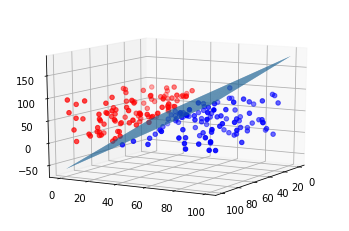

In [69]:
c = ["r" if i[3] == 1 else "b" for i in np.array(datafile2)]
x1 = np.linspace(0,100,100)
x2 = np.linspace(0,100,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = -(w0+w[0]*X1+w[1]*X2)/w[2]
ax=plt.figure().gca(projection="3d")
ax.scatter3D(np.array(datafile2[0]) , np.array(datafile2[1]) ,np.array(datafile2[2]),c=c )
ax.plot_surface(X1,X2,X3)
ax.view_init(13,30)
plt.show()

**Data 3**

In [70]:
datafile3

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1
...,...,...,...
195,8.22200,4.8614,0
196,11.64300,5.3394,0
197,8.16510,10.1410,0
198,14.25700,9.0196,0


In [71]:
datafile3.insert(0,"x0",1)

In [72]:
datafile3

,x0,0,1,2
0,1,-0.69736,-3.6535,1
1,1,-4.82200,-7.6336,1
2,1,-8.23430,-7.5536,1
3,1,-6.07640,-11.3800,1
4,1,-10.73600,-14.3760,1
...,...,...,...,...
195,1,8.22200,4.8614,0
196,1,11.64300,5.3394,0
197,1,8.16510,10.1410,0
198,1,14.25700,9.0196,0


In [73]:
data3 = np.array(datafile3)
np.random.shuffle(data3)

In [74]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data3[0])-1)
  for i in range(10):
    np.random.shuffle(data3)
    training_data = data3[:int(0.8*len(data3))]
    
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))))
      
        delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
        w += delta
      except:
        print("Excepted")

  cost_fn = 0
  validation_data = data3[int(0.8*len(data3)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


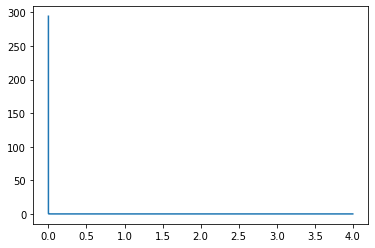

In [75]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [76]:

a = 1
w = np.random.random(len(data3[0])-1)
training = data3[:int(0.8*len(data3))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]


  for i in range(len(training_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))) )
   
    delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
    w += delta

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if cost_fn == 0:
    break 

cost_fn 0.0


In [77]:
print(w)

[ -0.40036388 -12.04996452  -8.4769421 ]


In [78]:
testing_data = data3[int(0.8*len(data3)):]
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [79]:
print(TP,FP,TN,FN)

20 0 20 0


In [80]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


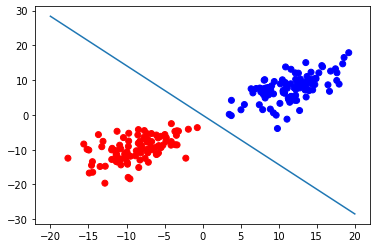

In [81]:
c = ["r" if i[3] == 1 else "b" for i in np.array(datafile3)]
x1 = np.linspace(-20,20,100)
x2 = -(w[0]+w[1]*x1)/w[2]
ax=plt.figure().gca()
ax.scatter(np.array(datafile3[0]) , np.array(datafile3[1]),c=c )
ax.plot(x1,x2)
plt.show()

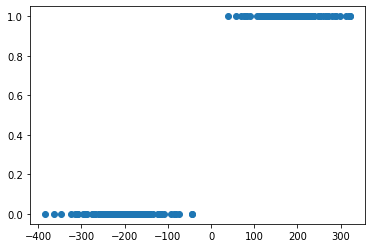

In [82]:
data_for_plot = [[],[]]
for i in range(len(data3)):
  t = np.inner(w,data3[i][:-1])
  f = 1 / ( 1+ np.exp(-t) )
  data_for_plot[0].append(t)
  data_for_plot[1].append(f)
plt.scatter(data_for_plot[0],data_for_plot[1])
plt.show()

**LDA on DATA 3**

In [83]:
datafile3 = pd.read_csv("Data_Mining_Assignment_03/data3.csv",header=None)

In [84]:
datafile3

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1
...,...,...,...
195,8.22200,4.8614,0
196,11.64300,5.3394,0
197,8.16510,10.1410,0
198,14.25700,9.0196,0


In [85]:
x = dict(datafile3[2].value_counts())

In [86]:
print(x)

{1: 100, 0: 100}


In [87]:
pi_1 = x[1] / x[0] + x[1]
pi_0 = x[0] / x[0] + x[1]

In [88]:
dataf3 = np.array(datafile3)
np.random.shuffle(dataf3)
data3 = dataf3[:int(0.7*len(dataf3))]

In [89]:
n = len(data3[0])-1
u1 = np.zeros(n)
u0 = np.zeros(n)
for i in range(len(data3)):
  if data3[i][-1] == 1:
    u1 += data3[i][:-1]
  else:
    u0 += data3[i][:-1]
u1 = u1 / x[1]
u0 = u0 / x[0]
print(u1)
print(u0)



[-5.938702 -6.856398]
[8.564769   5.84267544]


In [90]:
E1 = np.zeros((n,n))
E0 = np.zeros((n,n))
for i in range(len(data3)):
  if data3[i][-1] == 1:
    k = data3[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  else:
    k = data3[i][:-1] - u0
    E0 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E0 = E0 / (x[0] -1 )

In [91]:
print(E1)
print(E0)

[[13.17232129 11.00807575]
 [11.00807575 15.76124564]]
[[14.79044745  9.691393  ]
 [ 9.691393   13.691523  ]]


In [92]:
E = (x[1]-1)*E1 + (x[0]-1)*E0 
E = E / (x[1]+x[0]-2)
print(E)

[[13.98138437 10.34973438]
 [10.34973438 14.72638432]]


In [93]:
w = np.matmul(np.linalg.inv(E) , (u1-u0).reshape(-1,1))

In [94]:
print(w)

[[-0.83167763]
 [-0.27782997]]


In [95]:
w0 = -0.5 * np.matmul(np.matmul(u1,np.linalg.inv(E)), u1.reshape(-1,1) ) + 0.5 * np.matmul(np.matmul(u0,np.linalg.inv(E)), u0.reshape(-1,1) ) + np.log(pi_1/pi_0)
print(w0)

[0.95119934]


In [96]:
w = w.reshape(1,-1)[0]

In [97]:
testing_data = dataf3[int(0.7*len(dataf3)):]
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1]) + w0[0]
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [98]:
print(TP,FP,TN,FN)

34 0 26 0


In [99]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


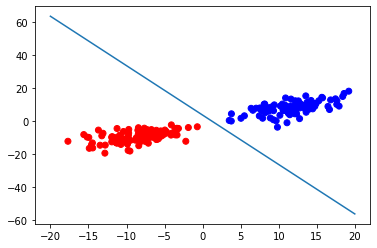

In [100]:
c = ["r" if i[2] == 1 else "b" for i in np.array(datafile3)]
x1 = np.linspace(-20,20,100)
x2 = -(w0+w[0]*x1)/w[1]
ax=plt.figure().gca()
ax.scatter(np.array(datafile3[0]) , np.array(datafile3[1]),c=c )
ax.plot(x1,x2)
plt.show()

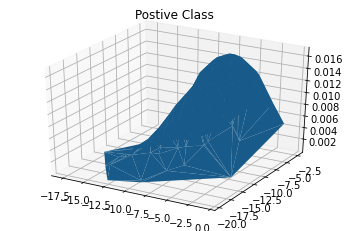

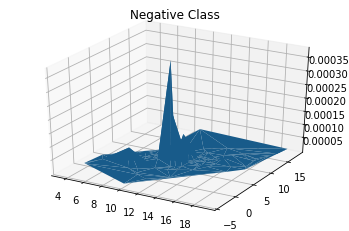

In [101]:
from scipy.stats import multivariate_normal
x = [i[:-1] for i in dataf3 if i[-1] == 1 ]
y = [i[:-1] for i in dataf3 if i[-1] == 0 ]
ax = plt.figure().gca(projection="3d")
X1,X2 = ([i[0] for i in x],[i[1] for i in x])
X3 = multivariate_normal.pdf(x,u1,E1)
ax.plot_trisurf(X1,X2,X3)
ax.set_title("Postive Class")
plt.show()

ax = plt.figure().gca(projection="3d")
Y1,Y2 = ([i[0] for i in y],[i[1] for i in y])
Y3 = multivariate_normal.pdf(x,u0,E0)
ax.plot_trisurf(Y1,Y2,Y3)
ax.set_title("Negative Class")

plt.show()

**Data 4**

In [102]:
datafile4

,0,1,2
0,12,26,1
1,13,30,1
2,14,31,1
3,14,32,1
4,15,18,1
...,...,...,...
145,12,9,0
146,12,10,0
147,12,16,0
148,13,8,0


In [103]:
datafile4.insert(0,"x0",1)

In [104]:
datafile4

,x0,0,1,2
0,1,12,26,1
1,1,13,30,1
2,1,14,31,1
3,1,14,32,1
4,1,15,18,1
...,...,...,...,...
145,1,12,9,0
146,1,12,10,0
147,1,12,16,0
148,1,13,8,0


In [105]:
data4 = np.array(datafile4)
np.random.shuffle(data4)

In [106]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data4[0])-1)
  for i in range(10):
    np.random.shuffle(data4)
    training_data = data4[:int(0.8*len(data4))]
    
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))))
      
        delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
        w += delta
      except:
        print("Excepted")

  cost_fn = 0
  validation_data = data4[int(0.8*len(data4)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


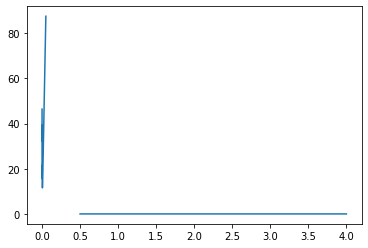

In [107]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [108]:

a = 1
w = np.random.random(len(data4[0])-1)
training = data4[:int(0.8*len(data4))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]


  for i in range(len(training_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))) )
   
    delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
    w += delta

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if abs(cost_fn_old-cost_fn) < 0.000001:
    break 

cost_fn inf
cost_fn inf
cost_fn inf
cost_fn inf
cost_fn inf
cost_fn 7.68968258697689
cost_fn 1.319411799406143e-05
cost_fn 1.199400920302044e-05
cost_fn 7.251106302461475e-05
cost_fn 1.597608953063392e-06
cost_fn 4.3317484929514816e-05
cost_fn 2.791653553971771e-05
cost_fn 1.123674803263033e-05
cost_fn 5.784469167108639e-07
cost_fn 9.19642922424999e-08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


In [109]:
print(w)

[-70.85774352   2.23747589   2.89747159]


In [110]:
testing_data = data4[int(0.8*len(data4)):]
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [111]:
print(TP,FP,TN,FN)

12 1 17 0


In [112]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 0.9444444444444444
Precision is 0.9230769230769231
F-score is 0.9600000000000001


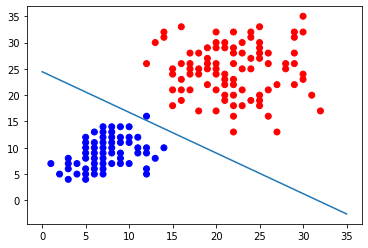

In [113]:
c = ["r" if i[3] == 1 else "b" for i in np.array(datafile4)]
x1 = np.linspace(0,35,100)
x2 = -(w[0]+w[1]*x1)/w[2]
plt.scatter(np.array(datafile4[0]) , np.array(datafile4[1]) ,c=c )
plt.plot(x1,x2)
plt.show()

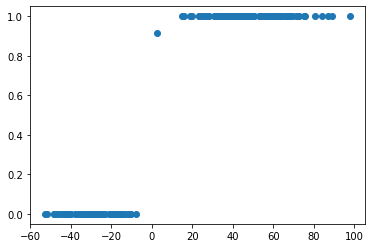

In [114]:
data_for_plot = [[],[]]
for i in range(len(data4)):
  t = np.inner(w,data4[i][:-1])
  f = 1 / ( 1+ np.exp(-t) )
  data_for_plot[0].append(t)
  data_for_plot[1].append(f)
plt.scatter(data_for_plot[0],data_for_plot[1])
plt.show()

**LDA on DATA 4**

In [115]:
datafile4 = pd.read_csv("Data_Mining_Assignment_03/data4.csv",header=None)

In [116]:
datafile4

,0,1,2
0,12,26,1
1,13,30,1
2,14,31,1
3,14,32,1
4,15,18,1
...,...,...,...
145,12,9,0
146,12,10,0
147,12,16,0
148,13,8,0


In [117]:
x = dict(datafile4[2].value_counts())

In [118]:
pi_1 = x[1] / x[0] + x[1]
pi_0 = x[0] / x[0] + x[1]

In [119]:
dataf4 = np.array(datafile4)
np.random.shuffle(dataf4)
data4 = dataf4[:int(0.7*len(dataf4))]

In [120]:
n = len(data4[0])-1
u1 = np.zeros(n)
u0 = np.zeros(n)
for i in range(len(data4)):
  if data4[i][-1] == 1:
    u1 += data4[i][:-1]
  else:
    u0 += data4[i][:-1]
u1 = u1 / x[1]
u0 = u0 / x[0]
print(u1)
print(u0)



[15.15730337 17.41573034]
[5.3442623  6.31147541]


In [121]:
E1 = np.zeros((n,n))
E0 = np.zeros((n,n))
for i in range(len(data4)):
  if data4[i][-1] == 1:
    k = data4[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  else:
    k = data4[i][:-1] - u0
    E0 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E0 = E0 / (x[0] -1 )

In [122]:
print(E1)
print(E0)

[[46.34902188 35.27092108]
 [35.27092108 57.61717127]]
[[ 8.09449969  5.70526292]
 [ 5.70526292 10.56761623]]


In [123]:
E = (x[1]-1)*E1 + (x[0]-1)*E0 
E = E / (x[1]+x[0]-2)
print(E)

[[30.8404318  23.28484345]
 [23.28484345 38.54302734]]


In [124]:
w = np.matmul(np.linalg.inv(E) , (u1-u0).reshape(-1,1))

In [125]:
print(w)

[[0.18509441]
 [0.17627989]]


In [126]:
w0 = -0.5 * np.matmul(np.matmul(u1,np.linalg.inv(E)), u1.reshape(-1,1) ) + 0.5 * np.matmul(np.matmul(u0,np.linalg.inv(E)), u0.reshape(-1,1) ) + np.log(pi_1/pi_0)
print(w0)

[-3.98358996]


In [127]:
w = w.reshape(1,-1)[0]

In [128]:
testing_data = dataf4[int(0.7*len(dataf4)):]
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1]) + w0[0]
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [129]:
print(TP,FP,TN,FN)

27 2 16 0


In [130]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 0.8888888888888888
Precision is 0.9310344827586207
F-score is 0.9642857142857143


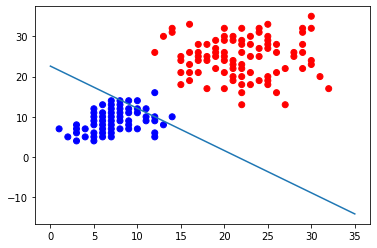

In [131]:
c = ["r" if i[2] == 1 else "b" for i in np.array(datafile4)]
x1 = np.linspace(0,35,100)
x2 = -(w0+w[0]*x1)/w[1]
plt.scatter(np.array(datafile4[0]) , np.array(datafile4[1]) ,c=c )
plt.plot(x1,x2)
plt.show()

#2. Generate outputs using the logistic function found  out in the previous question for Data 1, that is find the output using log(f(x)/(1-f(x)) and then apply linear regression on the resulting supervised data.
(a) Plot the decision boundary.

(b) Report mean square error.

(c) Compare the parameters obtained in this method with that generated in
previous question using logistic regression.

In [132]:
datafile1 = pd.read_csv("Data_Mining_Assignment_03/data1.csv",header=None)

In [133]:
datafile1.insert(0,"x0",1)

In [134]:
data1 = np.array(datafile1)
np.random.shuffle(data1)

In [135]:
w = [  10, -332,  292.]

In [136]:
f= []
for i in range(len(data1)):
  f.append(1 / ( 1+ np.exp(-(np.inner(w,data1[i][:-1])),dtype=np.longdouble)))
f = np.array(f)
y = np.log(f/(1-f),dtype=np.longdouble)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [137]:
datafile1.insert(4,4,y)

In [138]:
datafile1

,x0,0,1,2,4
0,1,6,32,1,inf
1,1,26,39,1,-4870.0
2,1,2,38,1,inf
3,1,25,39,1,-1638.0
4,1,3,35,1,-3590.0
...,...,...,...,...,...
195,1,47,17,-1,inf
196,1,24,27,-1,-4722.0
197,1,18,18,-1,-inf
198,1,19,7,-1,inf


In [139]:
datafile1=datafile1.drop(columns=[2])
datafile1[4] = datafile1[4].replace(np.inf,10**20)
datafile1[4] = datafile1[4].replace(np.NINF,-10**20)

In [140]:
data= np.array(datafile1,dtype=np.longdouble)

In [141]:
alpha_data = [[],[]]
for k in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4] :
  a = k
  for j in range(100):
    w = np.random.rand(3)
    np.random.shuffle(data)
    training = data[0:int(0.8*len(data))]
    validation  = data[int(0.8*len(data)):]
    for i in range(len(training)):
      diff = training[i][-1] - np.inner(w,training[i][:-1])
      delta_w =  a * ( diff ) * training[i][:-1]
      w = w + delta_w
    cost_fn = 0
  for i in range(len(validation)):
    error = validation[i][-1] - np.inner(w,validation[i][:-1])
    cost_fn += error**2
  cost_fn = 0.5*cost_fn
  alpha_data[0].append(k)
  alpha_data[1].append(cost_fn)




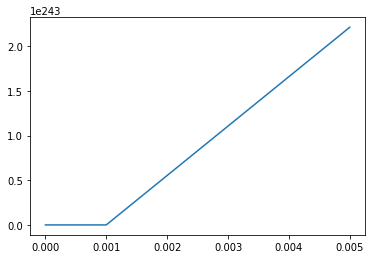

In [142]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [143]:

np.random.shuffle(data)

training_data = data[0:int(0.6*len(data))]
validation_data = data[int(0.6*len(data)):int(0.8*len(data))]

# Initializing the random weights
w = np.random.rand(3)

a = 0.0005

cost_fn_sum = 10
cost_fn_sum_new = 100

while(abs(cost_fn_sum_new-cost_fn_sum)>0.000001):

  cost_fn_sum = cost_fn_sum_new
  cost_fn_sum_new = 0
  
  # Training
  for i in range(len(training_data)):
    diff = training_data[i][-1] - np.inner(w,training_data[i][:-1])
    delta_w =  a * ( diff ) * training_data[i][:-1]
    w = w + delta_w

  # Validation
  for i in range(len(validation_data)):
    diff = validation_data[i][-1] - np.inner(w,validation_data[i][:-1])
    cost_fn_sum_new += diff**2



  print(cost_fn_sum_new)

4.593685243213168103e+41
4.58759044456295198e+41
4.581576585664229581e+41
4.5756425197943793992e+41
4.5697871175943165316e+41
4.5640092663222354544e+41
4.558307869603792081e+41
4.5526818471860843938e+41
4.5471301346953735724e+41
4.5416516833984883764e+41
4.5362454599678564826e+41
4.530910446250107307e+41
4.5256456390381916827e+41
4.520450049846964627e+41
4.51532270469217825e+41
4.5102626438728326633e+41
4.5052689217568335246e+41
4.500340606569905721e+41
4.495476780187713347e+41
4.4906765379311370174e+41
4.4859389883646602187e+41
4.4812632530978172004e+41
4.476648466589655594e+41
4.4720937759561676973e+41
4.467598340780645045e+41
4.4631613329269116103e+41
4.4587819363553916145e+41
4.4544593469419686795e+41
4.4501927722995936187e+41
4.4459814316025989226e+41
4.4418245554136785447e+41
4.437721385513492298e+41
4.4336711747328547585e+41
4.4296731867874691864e+41
4.4257266961151676155e+41
4.42183098771561881e+41
4.4179853569924664036e+41
4.414189109597860124e+41
4.410441561279343532e+41
4.40

In [144]:
print(w)

[6.36281361e+19 1.05646334e+18 8.74643582e+17]


In [145]:
# Testing
cost_fn_sum = 0
testing_set = data[int(0.8*len(data)):]
for i in range(len(testing_set)):
  diff = testing_set[i][-1] - np.inner(w,testing_set[i][:-1])
  cost_fn_sum += diff**2
cost_fn_sum = cost_fn_sum/len(testing_set)
print(cost_fn_sum)

8.672220188484931176e+39


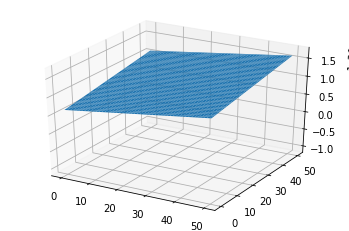

In [146]:
ax = plt.figure().gca(projection="3d")
ax.scatter3D(np.array(datafile1[0]),np.array(datafile1[1]),np.array(datafile1[4]))
x1 = np.linspace(0,50,100)
x2 = np.linspace(0,50,100)
X1,X2 = np.meshgrid(x1,x2)
Y = w[0]+w[1]*X1+w[2]*X2
ax.plot_surface(X1,X2,Y)
plt.show()

In [147]:
datafile1[4]

0      1.000000e+20
1     -4.870000e+03
2      1.000000e+20
3     -1.638000e+03
4     -3.590000e+03
           ...     
195    1.000000e+20
196   -4.722000e+03
197   -1.000000e+20
198    1.000000e+20
199    1.000000e+20
Name: 4, Length: 200, dtype: float128

# 7. Apply

(a) Multi class LDA on Data 5.

(b) Plot the decision boundary between classes.

(c) Report the values of the parameters.

(d) Assess the performance of the model.

In [148]:
datafile5

,0,1,2,3
0,-6.2213,2.84320,10.54700,1
1,-14.9730,-6.42750,3.83370,1
2,-5.9850,-3.94020,11.98600,1
3,-6.8994,1.87140,11.22500,1
4,-4.8246,4.94470,17.26100,1
...,...,...,...,...
295,1.8102,-0.59976,0.63192,3
296,9.5219,13.22700,13.51400,3
297,-3.8302,-0.51635,-0.49433,3
298,-4.2867,-4.10830,-1.15490,3


In [149]:
x = dict(datafile5[3].value_counts())
print(x)

{3: 100, 2: 100, 1: 100}


In [150]:
pi = {1 : x[1]/(x[1]+x[2]+x[3]) , 2 : x[2]/(x[1]+x[2]+x[3]) , 3 : x[3]/(x[1]+x[2]+x[3])}

In [151]:
dataf5 = np.array(datafile5)
np.random.shuffle(dataf5)
data5 = dataf5[:int(0.7*len(dataf5))]

In [152]:
n = len(data5[0])-1
u1 = np.zeros(n)
u2 = np.zeros(n)
u3 = np.zeros(n)
for i in range(len(data5)):
  if data5[i][-1] == 1:
    u1 += data5[i][:-1]
  elif data5[i][-1] == 2:
    u2 += data5[i][:-1]
  elif data5[i][-1] == 3:
    u3 += data5[i][:-1]
u1 = u1 / x[1]
u2 = u2 / x[2]
u3 = u3 / x[3]
print(u1)
print(u2)
print(u3)


[-7.600841  -4.0818412  8.817169 ]
[ 4.6935259  7.465399  -3.3988296]
[ 0.02305586 -0.16793655  0.15853724]


In [153]:
E1 = np.zeros((n,n))
E2 = np.zeros((n,n))
E3 = np.zeros((n,n))
for i in range(len(data5)):
  if data5[i][-1] == 1:
    k = data5[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  elif data5[i][-1] == 2:
    k = data5[i][:-1] - u2
    E2 += k.reshape(-1,1) * k
  elif data5[i][-1] == 3:
    k = data5[i][:-1] - u3
    E3 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E2 = E2 / (x[2] -1 )
E3 = E3 / (x[3] -1 )

In [154]:
print(E1)
print(E2)
print(E3)

[[13.70513778  7.89228726 -2.84281705]
 [ 7.89228726 10.4780337  -1.54961459]
 [-2.84281705 -1.54961459 15.19717459]]
[[13.88298807 11.91054262  0.38117735]
 [11.91054262 18.92106561 -2.06336237]
 [ 0.38117735 -2.06336237  8.28362202]]
[[10.03003089  8.08396123  5.602546  ]
 [ 8.08396123 15.19209272  4.44203499]
 [ 5.602546    4.44203499  7.93241286]]


In [155]:
E = (x[1]-1)*E1 + (x[2]-1)*E2 + (x[3]-1)*E3
E = E / (x[1]+x[2]+x[3]-3)
print(E)

[[12.53938558  9.29559704  1.04696877]
 [ 9.29559704 14.86373067  0.27635268]
 [ 1.04696877  0.27635268 10.47106982]]


In [156]:
A12 = np.matmul((u1-u2),np.linalg.inv(E))
b12 =  -np.log(pi[1]/pi[2]) + 0.5*(np.matmul( np.matmul( (u1+u2) ,  np.linalg.inv(E) ) , (u1-u2).reshape(-1,1)))

A13 = np.matmul((u1-u3),np.linalg.inv(E))
b13 =  -np.log(pi[1]/pi[3]) + 0.5*(np.matmul( np.matmul( (u1+u3) ,  np.linalg.inv(E) ) , (u1-u3).reshape(-1,1)))

A23 = np.matmul((u2-u3),np.linalg.inv(E))
b23 =  -np.log(pi[2]/pi[3]) + 0.5*(np.matmul( np.matmul( (u2+u3) ,  np.linalg.inv(E) ) , (u2-u3).reshape(-1,1)))


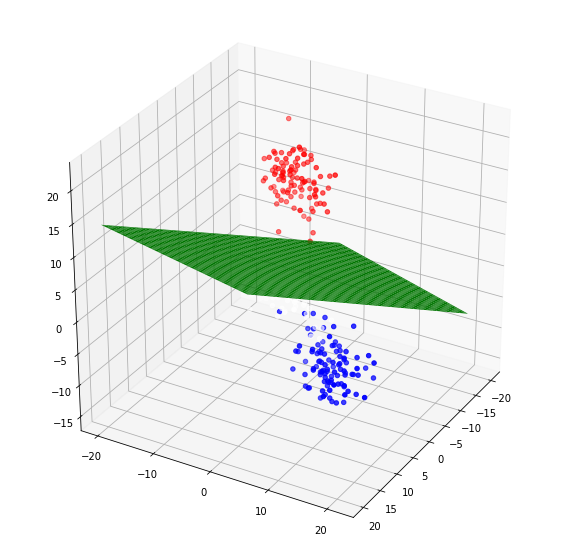

In [157]:
# Desicion boundary between class 1 (red) and class 2(blue)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("r") 
  elif i[3]==2:
    c.append("b")
  else :
    c.append("w")
ax=plt.figure(figsize=[10,10]).gca(projection="3d")
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-20,20,100)
x2 = np.linspace(-20,20,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A12[0]*X1+A12[1]*X2-b12)/(-A12[2])
ax.plot_surface(X1,X2,X3,color="green")
ax.view_init(30,30)
plt.show()

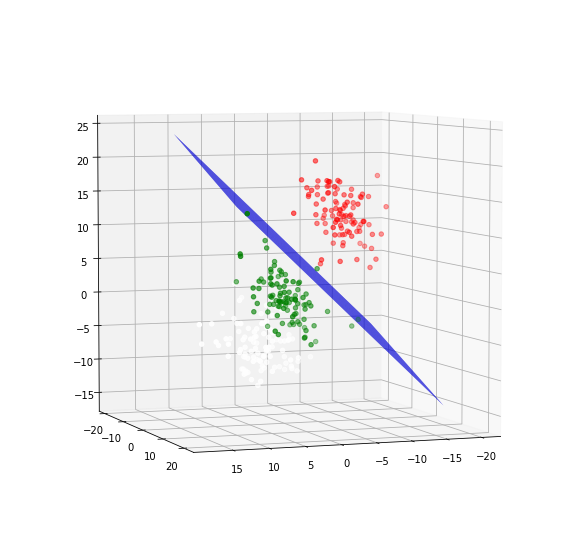

In [158]:
# Desicion boundary between class 1 (red) and class 3(green)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("r") 
  elif i[3]==2:
    c.append("w")
  else :
    c.append("g")
ax=plt.figure(figsize=[10,10]).gca(projection="3d")
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-20,10,100)
x2 = np.linspace(-20,10,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A13[0]*X1+A13[1]*X2-b13)/(-A13[2])
ax.plot_surface(X1,X2,X3,color="b")
ax.view_init(5,70)
plt.show()

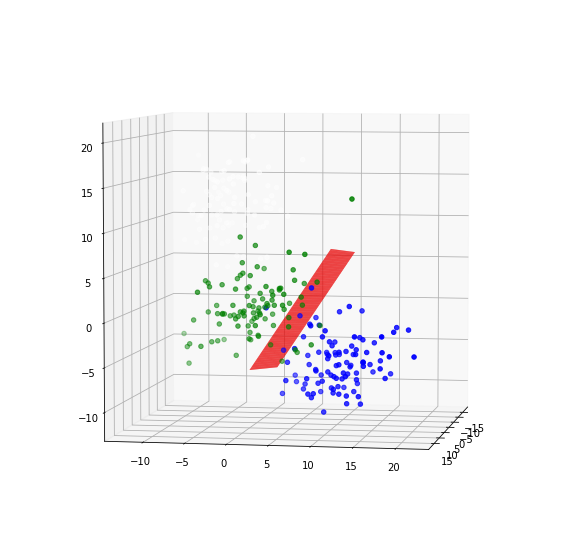

In [159]:
# Desicion boundary between class 2 (blue) and class 3(green)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("w") 
  elif i[3]==2:
    c.append("b")
  else :
    c.append("g")
ax=plt.figure(figsize=[10,10]).gca(projection="3d")
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-15,5,100)
x2 = np.linspace(0,10,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A23[0]*X1+A23[1]*X2-b23)/(-A23[2])
ax.plot_surface(X1,X2,X3,color="red")
ax.view_init(5,10)
plt.show()

In [160]:
#Testing
confusion_matrix = np.zeros((4,4)) 
testing_data = dataf5[int(0.7*len(dataf5)):]
for i in range(len(testing_data)):
  cls = 0
  k = sum(A12 * testing_data[i][:-1]) - b12
  if k>= 0:
    l = sum(A13 * testing_data[i][:-1]) - b13
    if l >= 0 :
      cls = 1
    else:
      cls = 3
  else:
    m = sum(A23 * testing_data[i][:-1]) - b23 
    if m>= 0:
      cls = 2
    else:
      cls = 3
  confusion_matrix[cls][int(testing_data[i][-1])] += 1


In [161]:
confusion_matrix

array([[ 0.,  0.,  0.,  0.],
       [ 0., 26.,  0.,  1.],
       [ 0.,  0., 32.,  1.],
       [ 0.,  0.,  1., 29.]])

In [162]:
precision = {}
precision[1] = confusion_matrix[1][1]/(sum(confusion_matrix[1]))
precision[2] = confusion_matrix[2][2]/(sum(confusion_matrix[2]))
precision[3] = confusion_matrix[3][3]/(sum(confusion_matrix[3]))

recall = {}
recall[1] = confusion_matrix[1][1]/(sum(confusion_matrix[:,1]))
recall[2] = confusion_matrix[2][2]/(sum(confusion_matrix[:,2]))
recall[3] = confusion_matrix[3][3]/(sum(confusion_matrix[:,3]))

f_score = {}
f_score[1] = (2*precision[1]*recall[1])/(precision[1]+recall[1])
f_score[2] = (2*precision[2]*recall[2])/(precision[2]+recall[2])
f_score[3] = (2*precision[3]*recall[3])/(precision[3]+recall[3])

In [163]:
print(f_score)

{1: 0.9811320754716981, 2: 0.9696969696969697, 3: 0.9508196721311476}


#16. Apply multiclass logistic regression and multiclass LDA on Arrhythmia Data Set.

(a) Explain the experimental procedure.

(b) Report the values of the parameters.

(c) Compare the performance of the algorithms by applying statistical measures.

(d) Write report on the results obtained.

In [164]:
adata = pd.read_csv("Data_Mining_Assignment_03/arrhythmia.data",header=None)
adata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0.0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0.0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0.0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0.0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [165]:
keys = []
for (k,v) in dict((adata != 0).any(axis=0)).items():
  if not v:
    keys.append(k)
print(keys)

[19, 67, 69, 83, 131, 132, 139, 141, 143, 145, 151, 156, 157, 164, 204, 264, 274]


In [166]:
adata = adata.drop(columns=keys)

In [167]:
adata[279] =adata[279].replace(14,11)
adata[279] =adata[279].replace(15,12)
adata[279] =adata[279].replace(16,13)

In [168]:
x = dict(adata[279].value_counts())
print(x)

{1: 245, 10: 50, 2: 44, 6: 25, 13: 22, 4: 15, 3: 15, 5: 13, 9: 9, 12: 5, 11: 4, 7: 3, 8: 2}


In [169]:
adata = adata.replace('?',0)

In [170]:
w = np.zeros((len(x),len(adata[0])-1))

In [171]:
pi = np.zeros(len(x)+1)
total = 0
for i in range(1,len(pi)):
  pi[i] = x[i]
  total += x[i]
pi = pi / total
print(pi)

[0.         0.5420354  0.09734513 0.03318584 0.03318584 0.02876106
 0.05530973 0.00663717 0.00442478 0.0199115  0.11061947 0.00884956
 0.01106195 0.04867257]


In [172]:
adata_set = np.array(adata,dtype=float)
# np.random.shuffle(adata_set)
training = adata_set

In [173]:
u = np.zeros((  len(x)+1  ,  len(training[0])-1 ))
for i in range(len(training)):
  k = int(training[i][-1])
  u[k] += (training[i][:-1]/x[k])
print(u)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.62734694e+01  6.53061224e-01  1.64102041e+02 ...  1.59795918e+00
   2.03114286e+01  3.38367347e+01]
 [ 5.17500000e+01  5.90909091e-01  1.63068182e+02 ... -6.00000000e-01
   2.03136364e+01  1.37954545e+01]
 ...
 [ 1.95000000e+01  2.50000000e-01  1.56000000e+02 ...  1.35000000e+00
   3.42000000e+01  4.29500000e+01]
 [ 5.74000000e+01  8.00000000e-01  1.61400000e+02 ...  1.66533454e-16
   1.69400000e+01  1.69800000e+01]
 [ 4.42727273e+01  3.18181818e-01  1.65000000e+02 ...  1.05000000e+00
   1.98636364e+01  2.96818182e+01]]


In [174]:
E = np.zeros((len(x)+1,len(training[0])-1,len(training[0])-1))
for i in range(len(training)):
  k = int(training[i][-1])
  j = training[i][:-1] - u[k]
  E[k] += (j.reshape(-1,1) * j)
E = sum(E)/(total-len(x))
E

array([[ 2.41132557e+02, -3.10745684e-01, -4.11750098e+01, ...,
        -3.41928949e+00, -3.96631262e+00, -4.16868632e+01],
       [-3.10745684e-01,  2.25225698e-01, -2.43838509e+00, ...,
         2.40020264e-02, -8.72599119e-02, -3.11296709e-02],
       [-4.11750098e+01, -2.43838509e+00,  1.27482702e+03, ...,
        -1.48580037e+00, -6.74720427e+00, -3.24042399e+01],
       ...,
       [-3.41928949e+00,  2.40020264e-02, -1.48580037e+00, ...,
         1.34094804e+00, -6.24363422e-01,  1.33414409e+01],
       [-3.96631262e+00, -8.72599119e-02, -6.74720427e+00, ...,
        -6.24363422e-01,  1.45409190e+02,  1.36123373e+02],
       [-4.16868632e+01, -3.11296709e-02, -3.24042399e+01, ...,
         1.33414409e+01,  1.36123373e+02,  2.83131569e+02]])

In [175]:
A = np.zeros( 
    ( len(x)+1 , len(x)+1 , 1 , len(training[0])-1  ) 
    )
b = np.zeros(( len(x)+1 , len(x)+1 ))

for i in range(len(A)):
  for j in range(i+1,len(A)):

    A[i][j] = np.matmul((u[i]-u[j]),np.linalg.inv(E))
    b[i][j] =  -np.log(pi[i]/pi[j]) + 0.5*(np.matmul( np.matmul( (u[i]+u[j]) ,  np.linalg.inv(E) ) , (u[i]-u[j]).reshape(-1,1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [176]:
cm = np.zeros((len(x)+1,len(x)+1))

In [177]:
for m in range(len(adata_set)):
  cls = 0
  i = 1
  while(i < len(A)):
    j = i+1
    while(j<len(A)):
      k = sum(A[i][j][0] * adata_set[m][:-1]) - b[i][j]
      if k < 0:
        i = j-1
        break
      j+=1
    else:
      cls = i
      break
    i += 1
  else:
    cls = i
  cm[i][int(adata_set[m][-1])] += 1

In [178]:
cm

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0., 235.,   8.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   1.],
       [  0.,   0.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,  15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  13.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   5.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,   0.,
          0.,   0

In [179]:


precision = np.zeros(len(cm))
recall = np.zeros(len(cm))
f_score = np.zeros(len(cm))

for i in range(1,len(precision)):
  precision[i] = cm[i][i]/(sum(cm[i]))
  recall[i] = cm[i][i]/(sum(cm[:,i]))
  f_score[i] = (2*precision[i]*recall[i])/(precision[i]+recall[i])

In [180]:
fscore = {k:v for k,v in enumerate(f_score)}
del(fscore[0])
print("F Scores of each class are")
for k,v in fscore.items():
  print(f"Class {k} : F-score {v}")


F Scores of each class are
Class 1 : F-score 0.9572301425661914
Class 2 : F-score 0.8571428571428571
Class 3 : F-score 1.0
Class 4 : F-score 1.0
Class 5 : F-score 1.0
Class 6 : F-score 0.9090909090909091
Class 7 : F-score 0.8
Class 8 : F-score 1.0
Class 9 : F-score 1.0
Class 10 : F-score 0.9702970297029702
Class 11 : F-score 1.0
Class 12 : F-score 0.9090909090909091
Class 13 : F-score 0.875
